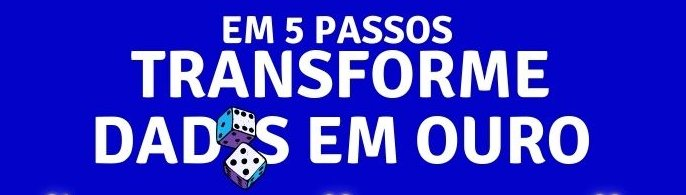

In [8]:
from IPython.core.display import HTML
from IPython.display import Image,display
from extra import extra as ex
ex.display(HTML(ex.toggle_code_prepare_str + ex.toggle_code_str))
ex.display(Image(filename='.img/logoev.jpg',width = 1000,height = 1000))

In [4]:
!ls

extra  img  step1.ipynb  step2.ipynb  step3.ipynb  step4.ipynb	step5.ipynb


In [21]:
!python -V

Python 3.8.5


# NESSES 5 PASSOS, TRANSFORME OS DADOS EM OURO ...

  Olá pessoal, nesse notebook vamos aprender um pouco sobre 5 passos de ouro que devem ser respeitados para desenvolvimento do seu projeto de *CIÊNCIA DE DADOS* , claro que não são obrigatorios :3 cada um tem sua forma de trabalho, mas sem dúvida alguma você ira realizar cada uma dessas tarefas que serão desenvolvidas abaixo, depende da forma que você particiona a tarefa.  

  Por fim, vamos lá, vamos trabalhar com o clássico banco de dados *TITANIC* , onde queremos desempenhar a seguinte tarefa de classificação: Saber se você sobreviveria ou não ao maior naufrago do mundo. Vamos a batalha !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

* **Importando bibliotecas a serem usadas:**

In [26]:
# Para trabalhar em cima do banco ...
toggle_code()
# PASSO (I) E (II)
import pandas as pd # lib para importação e processamento dos dados
import seaborn as sns # lib para visualização dos dados
import matplotlib.pyplot as plt # lib para visualização dos dados (usa-se mais com orientação ao objeto)

# PASSO (III)
from sklearn.preprocessing import MinMaxScaler # Método de pré-processamento, transforma para o intervalo (0, 1)
from sklearn.linear_model import LogisticRegression # Método para classificação da nossa tarefa

# PASSO (IV) E (V)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
sns.set_style('darkgrid')

# Extras
import os as os

## PASSO (I): IMPORTANDO E CONHECENDO NOSSO BANCO DE DADOS ...

Primeira coisa, vamos conhecer nosso banco de dados. Ele está estruturado com as seguintes variaveis, e suas descrições :

### Conhecendo o banco:


| Variável |                    Definição                    |                      Chave                     |
|:--------:|:-----------------------------------------------:|:----------------------------------------------:|
| survival |                   Sobrevivente                  |                0 = Não, 1 = Sim                |
|  pclass  |                 Classe do ticket                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|    sex   |                       Sexo                      |                                                |
|    Age   |                  Idade em anos                  |                                                |
|   sibsp  |    Total de irmãos/esposas abordo do titanic    |                                                |
|   parch  | Total de parentes/filhos (as) abordo do titanic |                                                |
|  ticket  |                 Número do ticket                |                                                |
|   fare   |               Tárifa do passageiro              |                                                |
|   cabin  |                 Número da cabine                |                                                |
| embarked |                Porto de Embarque                | C = Cherbourg, Q = Queenstown, S = Southampton 
|

* **Algumas notas a respeito das variaveis :**
    - pclass: Uma aproximação para o status socioeconômico
        - 1st = Alta
        - 2nd = Média
        - 3rd = Baixa
    
    - age: A idade é fracionária se menor que 1. Se a idade for estimada, é na forma de xx.5

    - sibsp: O conjunto de dados define relações familiar desse jeito ...
    
        - sibling: irmão, irmã, meio irmão, meia irmã

        - spouse: esposo, esposa

    - parch: o conjunto de dados define relações familiar dessa forma ...

        - parent: mãe, pai
    
        - child: filha, filho, enteado, enteada

        - Algumas crianças viajavam apenas com a babá, portanto parch = 0 para elas.
        

### Importando os dados:

Agora vamos importar os dados, mas vale ressaltar o seguinte: o banco está partido em dois, em dados de *teste* e *treino* , mas é intuitivo o porque, um nos iremos utilizar mais a frente para treinar nosso modelo *(titanic_train)* e logo em seguida, utilizaremos o outro para testar o nosso modelo de regressão logistica *(titanic_test)* .

* **Notas sobre os bancos:**
    - *titanic_train* : possui todas as variaveis explicitadas acima;
    - *titanic_test* : possui todas as variaveis explicitadas acima, menos o nosso *target* (survival).

Agora vamos trabalhar !! vamos importar eles :

In [27]:
def get_data(path, names, sep = '/'):
    df_train = pd.read_csv('/'.join(os.getcwd().split(f'{sep}')[:(-1)]) + f'/{path}/' + names[0])
    df_test = pd.read_csv('/'.join(os.getcwd().split(f'{sep}')[:(-1)]) + f'/{path}/' + names[1])
    return df_train, df_test

In [32]:
names = ('titanic_train.csv','titanic_test.csv')
df_train= get_data(path = 'data', names = names, sep = '/')[0]
df_test = get_data(path = 'data', names = names, sep = '/')[1]

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
print('Titanic treino: ')
print()
print(f'\t  Variaveis: {df_train.shape[1]} \n \t  Número de instancias: {df_train.shape[0]}')
print()
print()
print('Titanic teste: ')
print()
print(f'\t  Variaveis: {df_test.shape[1]} \n \t  Número de instancias: {df_test.shape[0]}')

Titanic treino: 

	  Variaveis: 12 
 	  Número de instancias: 891


Titanic teste: 

	  Variaveis: 11 
 	  Número de instancias: 418


Que tal juntar os bancos ?! mas claro, sem a variavel *target* do nosso projeto. Possa ser que seja interessante analisarmos o conjunto como um todo, para retirarmos algumas estatisticas interessantes sobre o nosso conjunto. Então vamos juntar os bancos, sem considerar o target:

In [ ]:
df = pd.concat([df_train.drop(['Survived'], axis = 1), df_test],ignore_index=1)
df.head()

In [ ]:
print('Titanic dataset (- survived): ')
print()
print(f'\t  Variaveis: {df.shape[1]} \n \t  Número de instancias: {df.shape[0]}')

In [ ]:
df_train.shape[0] + df_test.shape[0] == df.shape[0]